# Vaidya metric as from litrature

In [15]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()

### Defining our time dependent metric as from equation 31
https://docs.einsteinpy.org/en/latest/examples/Symbolically%20Understanding%20Christoffel%20Symbol%20and%20Riemann%20Curvature%20Tensor%20using%20EinsteinPy.html

https://en.wikipedia.org/wiki/Vaidya_metric

In [42]:
syms = sympy.symbols("t r theta phi")
G, M, c, a, w, k = sympy.symbols("G M c a w k")
a = M*(1 + w*syms[0])
print(a)
# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -(1 - (2*a / syms[1]))* (c ** 2)
list2d[0][1] = k*c
list2d[1][0] = k*c
list2d[1][1] = 0 
list2d[2][2] = 1 * (syms[1] ** 2) 
list2d[3][3] = 1 * (syms[1] ** 2) * (sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()


M*(t*w + 1)


⎡ 2 ⎛2⋅M⋅(t⋅w + 1)    ⎞                     ⎤
⎢c ⋅⎜───────────── - 1⎟  c⋅k  0       0     ⎥
⎢   ⎝      r          ⎠                     ⎥
⎢                                           ⎥
⎢         c⋅k             0   0       0     ⎥
⎢                                           ⎥
⎢                              2            ⎥
⎢          0              0   r       0     ⎥
⎢                                           ⎥
⎢                                  2    2   ⎥
⎣          0              0   0   r ⋅sin (θ)⎦

### Calculating the Einstein Tensor (with both indices covariant)

In [43]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡      ⎛           2                2                                                2        ⎞        ⎛     2⎞      ⎤
⎢1.0⋅c⋅⎝- 2.0⋅M⋅c⋅k ⋅t⋅w - 2.0⋅M⋅c⋅k  + 2.0⋅M⋅c⋅t⋅w + 2.0⋅M⋅c + 2.0⋅M⋅k⋅r⋅w + 1.0⋅c⋅k ⋅r - c⋅r⎠  1.0⋅c⋅⎝1 - k ⎠      ⎥
⎢──────────────────────────────────────────────────────────────────────────────────────────────  ──────────────  0  0⎥
⎢                                             2  3                                                       2           ⎥
⎢                                            k ⋅r                                                     k⋅r            ⎥
⎢                                                                                                                    ⎥
⎢                                              ⎛     2⎞                                                              ⎥
⎢                                        1.0⋅c⋅⎝1 - k ⎠                                                              ⎥
⎢                                        ───────

In [44]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡2⋅M⋅c⋅w                             ⎤
⎢───────  0    0            0        ⎥
⎢     2                              ⎥
⎢  k⋅r                               ⎥
⎢                                    ⎥
⎢   0     0    0            0        ⎥
⎢                                    ⎥
⎢                1                   ⎥
⎢   0     0  1 - ──         0        ⎥
⎢                 2                  ⎥
⎢                k                   ⎥
⎢                                    ⎥
⎢                    ⎛ 2    ⎞    2   ⎥
⎢                    ⎝k  - 1⎠⋅sin (θ)⎥
⎢   0     0    0     ────────────────⎥
⎢                            2       ⎥
⎣                           k        ⎦

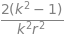

In [45]:
# Ricci scalar
R = RicciScalar.from_riccitensor(ri)
R.simplify()
R.expr



In [40]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

⎡                                                                                                                                                             
⎢                                                  ⎡0         0                                0                                                   0          
⎢                                                  ⎢                                                                                                          
⎢                                                  ⎢        2                                                                                                 
⎢                                                  ⎢   2⋅M⋅c ⋅(t⋅w + 1)                                                                                       
⎢                                                  ⎢0  ────────────────                        0                                                   0          
⎢                                             

In [41]:
###Plot something
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.5, 20.0, 0.04)
func(0.5,x,0, 0, 1, 1, 1)[0][1]

# Call the functions
y = func(1.0,x,1, 1, 1, 1, 1)[0][1]
z = -func(1.0,x,1, 1, 1, 1, 1)[0][0] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")




(t, r, theta, phi, M, c, k, w)


TypeError: _lambdifygenerated() missing 1 required positional argument: 'w'